In [17]:

def filename(delta, mu, d, T, ic_seed, seed):
    fn = f"../computation-database/5seed/H3H3_delta{delta}_mu{mu}_d{d}_T{T}_icseed{ic_seed}_seed{seed}.npz"
    return fn

In [18]:
import matplotlib.pyplot as plt
import numpy as np

## configuration ##
l = 3.
mus = [
    0.,
    1.,
    l/2,
    (3*l-2)/4
]
ds = [64, 128, 256, 512,1024]
# nseeds = 5
seed = 0
ic_seed = 0
ic_seed ^= 9031908 ## Do bit change the XOR seed!
gamma_prefactor = 0.01

noise = 0.
p = 1
k = 1
## end configuration ##

import numpy as np

def get_delta(mu, d):
    return l/2 - mu - np.log(gamma_prefactor)/np.log(d)

def get_T(delta, mu, d):
    T = int(np.power(d, delta + l/2 - 1))
    return T

colors = ['red', 'blue', 'green', 'orange', 'purple']




def plotter(mu, ds, ax, ylabel = False, spherical = False):
    for i, d in enumerate(ds):
        delta = get_delta(mu, d)
        T = get_T(delta, mu, d)
        data = np.load(filename(delta, mu, d, T, ic_seed, seed))
        gd_plain_errors = data['gd_plain_errors']
        gd_correlation_errors = data['gd_correlation_errors']
        projected_gd_plain_errors = data['projected_gd_plain_errors']
        projected_gd_correlation_errors = data['projected_gd_correlation_errors']
        spherical_gd_plain_errors = data['spherical_gd_plain_errors']
        spherical_gd_correlation_errors = data['spherical_gd_correlation_errors']
        #
        gd_plain_m = data['gd_plain_m']
        gd_correlation_m = data['gd_correlation_m']
        projected_gd_plain_m = data['projected_gd_plain_m']
        projected_gd_correlation_m = data['projected_gd_correlation_m']
        spherical_gd_plain_m = data['spherical_gd_plain_m']
        spherical_gd_correlation_m = data['spherical_gd_correlation_m']

        ax.plot(np.arange(T+1)[::max(1,T//500)], projected_gd_correlation_m[::max(1,T//500)], label=f'Proj. Corr. d={d}', marker='x', color=colors[i], ls='')
        ax.plot(np.arange(T+1)[::max(1,T//500)], projected_gd_plain_m[::max(1,T//500)], label=f'Proj. Plain d={d}', marker='s', color=colors[i], ls='')
        if spherical:
            ax.plot(np.arange(T+1)[::max(1,T//500)], spherical_gd_correlation_m[::max(1,T//500)], label=f'Sph. Corr. d={d}', marker='o', color=colors[i], ls='')
            ax.plot(np.arange(T+1)[::max(1,T//500)], spherical_gd_plain_m[::max(1,T//500)], label=f'Sph. Plain d={d}', marker='^', color=colors[i], ls='')
    ax.set_xlabel('$T$')
    ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_ylim(-.1, 1.1)
    ax.set_xlim(max(1,T//500),T/2)
    ax.axhline(1, color='black', ls='--', linewidth=1)

In [19]:
def do_plot(spherical = False):
    nplots = 3
    fig, axes = plt.subplots(1, nplots, figsize=(12, 12/nplots), sharey=True, gridspec_kw={'wspace': 0., 'hspace': 0.})
    for mu,ax in zip(mus[4-nplots:], axes):
        if mu == 0.:
            plotter(mu, ds[1:-1],ax, spherical=spherical)
        else:
            plotter(mu, ds[3:], ax, spherical=spherical)
    axes[0].set_ylabel(r'$m_t= \langle \mathbf{w}_t , \mathbf{w}^\star \rangle$')
    axes[1].legend()
    axes[0].set_title(r'SGD Learning ($\mu=1$)', color='Green', fontname='Computer Modern')
    axes[1].set_title(r'Optimal Point ($\mu=\frac{\ell}{2}$)', color='Cyan', fontname='Computer Modern')
    axes[2].set_title(r'Corr. SGD Learning ($\mu=\frac{3\ell-2}{4}$)', color='Orange', fontname='Computer Modern')
    plt.tight_layout()
    spherical_str = '[spherical]' if spherical else ''
    plt.savefig(f'figures/H3H3_m_vs_T{spherical_str}.pdf')
    plt.show()

findfont: Font family 'Computer Modern' not found.
findfont: Font family 'Computer Modern' not found.
findfont: Font family 'Computer Modern' not found.


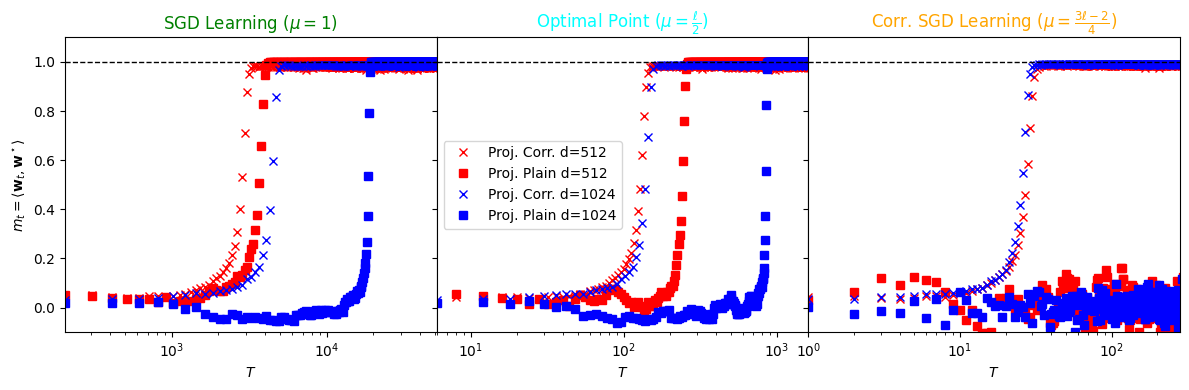

findfont: Font family 'Computer Modern' not found.
findfont: Font family 'Computer Modern' not found.
findfont: Font family 'Computer Modern' not found.


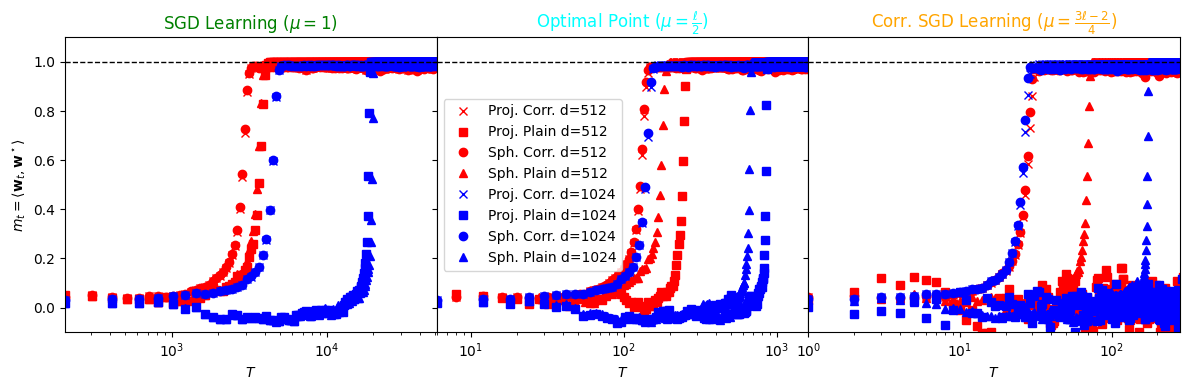

In [20]:
do_plot(spherical=False)
do_plot(spherical=True)